In [2]:
# Pandas for managing datasets
import numpy as np
import pandas as pd

In [3]:
# math for operating numbers
import math

In [4]:
# Change pd displayg format for float
pd.options.display.float_format = '{:,.4f}'.format

# to show complete output of a cell: eg.
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df.apply(lambda x:x.unique().size))

In [5]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# Seaborn for plotting and styling
import seaborn as sns
#Seaborn set() to set aesthetic parameters in one step.
sns.set() 


In [7]:
# Read dataset
df = pd.read_csv('../../../BDSE12-Group3/datasets/homecdt_eda/application_train.csv')

In [8]:
df.shape

(307511, 122)

In [9]:
# Randomized sampling from original dataset.
# This is just for simplifying the development process
# After coding is complete, should replace all df-->df, and remove this cell
# Reference: https://yiidtw.github.io/blog/2018-05-29-how-to-shuffle-dataframe-in-pandas/

# df= df.sample(n = 1000).reset_index(drop=True)
# df.shape

In [10]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.0000","406,597.5000","24,700.5000",...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,"270,000.0000","1,293,502.5000","35,698.5000",...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.0000","135,000.0000","6,750.0000",...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
df['ORGANIZATION_TYPE'].value_counts()

---

### Quick check for multicolumn relationships

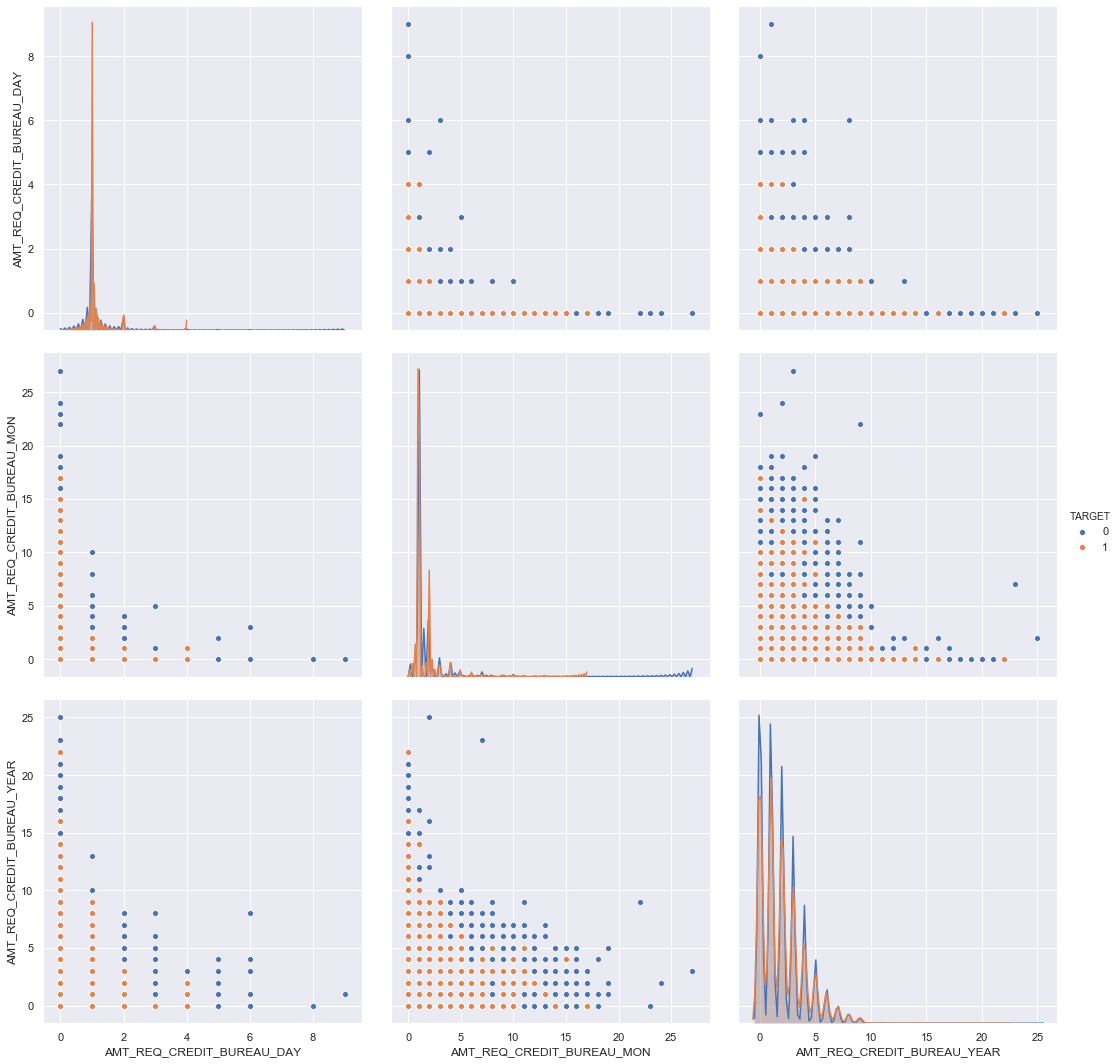

In [13]:
# sns.pairplot(df, hue='TARGET', vars=['AMT_REQ_CREDIT_BUREAU_DAY',
#                                      'AMT_REQ_CREDIT_BUREAU_MON',
#                                      'AMT_REQ_CREDIT_BUREAU_YEAR'], dropna=True, height=5)

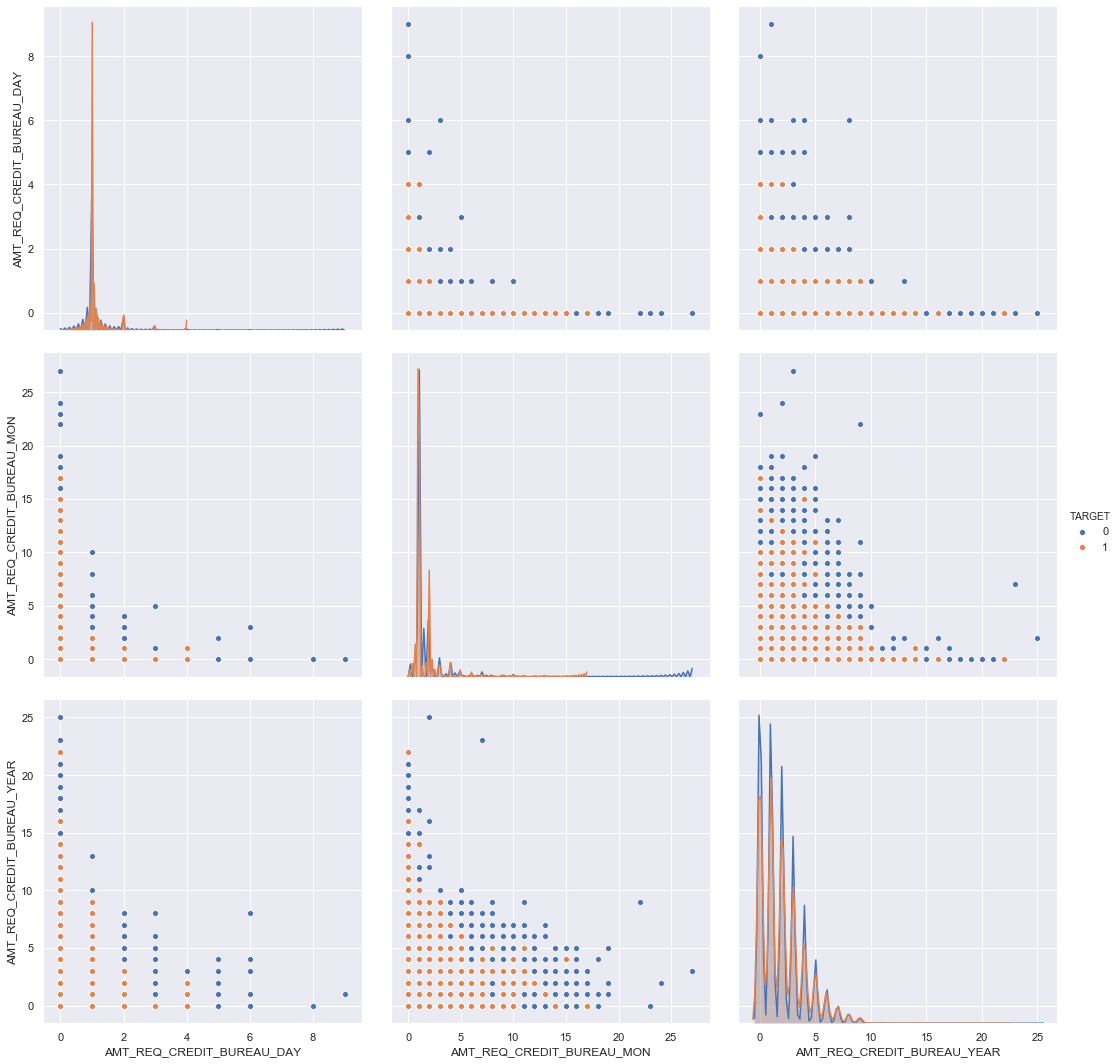

In [14]:
sns.pairplot(df, hue='TARGET', vars=['AMT_REQ_CREDIT_BUREAU_DAY',
                                     'AMT_REQ_CREDIT_BUREAU_MON',
                                     'AMT_REQ_CREDIT_BUREAU_YEAR'], dropna=True, height=5).savefig('output.png')

---

### Quick check for numerical columns

In [162]:
numcol = df['AMT_REQ_CREDIT_BUREAU_YEAR']

In [163]:
# numcol.describe()

In [164]:
numcol.isnull().sum(), \
numcol.size, \
(numcol.isnull().sum()/numcol.size).round(4)

(41519, 307511, 0.135)

(array([1.85398e+05, 5.43420e+04, 2.28880e+04, 3.22300e+03, 8.30000e+01,
        2.90000e+01, 1.60000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

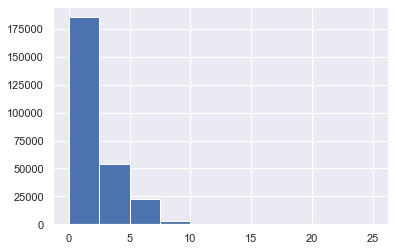

In [165]:
plt.hist(numcol, label=True, range=None)
# plt.hist(numcol, label=True, range=(0,0.3))

In [166]:
# plt.hist(df['EXT_SOURCE_1'],label='EXT_SOURCE_1',alpha=0.7, cumulative=True)
# plt.hist(df['EXT_SOURCE_2'],label='EXT_SOURCE_2',alpha=0.6, cumulative=True)
# plt.hist(df['EXT_SOURCE_3'],label='EXT_SOURCE_3',alpha=0.5, cumulative=True)

In [72]:
plt.hist?
# plt.hist2d?

In [111]:
# plt.savefig('output.png')

In [112]:
# df.groupby('state')['name'].nunique().plot(kind='bar')
# plt.show()
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#bar-plot-with-group-by

In [21]:
# numcol.value_counts(sort=True), numcol.unique().size

In [ ]:
# numcol_toYear = pd.to_numeric(\
#                               ((numcol.abs() / 365) \
#                                .round(0)) \
#                               ,downcast='integer')
# numcol_toYear.describe()

In [ ]:
# numcol_toYear.value_counts(sort=True), numcol_toYear.unique().size

### Quick check for categorical columns

In [181]:
catcol = df['AMT_REQ_CREDIT_BUREAU_HOUR']

In [182]:
catcol.unique(), \
catcol.unique().size

(array([ 0., nan,  1.,  2.,  3.,  4.]), 6)

In [183]:
catcol.value_counts(sort=True), \
catcol.unique().size

(0.0000    264366
 1.0000      1560
 2.0000        56
 3.0000         9
 4.0000         1
 Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64, 6)

In [184]:
catcol.isnull().sum(), \
catcol.size, \
(catcol.isnull().sum()/catcol.size).round(4)

(41519, 307511, 0.135)

---

# Tool: Get numerical/ categorical variables(columns) from a dataframe

In [ ]:
def get_num_df (data_df, unique_value_threshold: int):
    """ 
    Output: a new dataframe with columns of numerical variables from the input dataframe.
    Input: 
        data_df: original dataframe, 
        unique_value_threshold(int): number of unique values of each column
    e.g. If we define a column with > 3 unique values as being numerical variable, unique_value_threshold = 3
    """
    num_mask = data_df.apply(lambda x:x.unique().size > unique_value_threshold,axis=0) 
    num_df = data_df[data_df.columns[num_mask]]
    return num_df

def get_cat_df (data_df, unique_value_threshold: int):
    """ 
    Output: a new dataframe with columns of categorical variables from the input dataframe.
    Input: 
        data_df: original dataframe, 
        unique_value_threshold(int): number of unique values of each column
    e.g. If we define a column with =<3 unique values as being numerical variable, unique_value_threshold = 3
    """
    cat_mask = data_df.apply(lambda x:x.unique().size <= unique_value_threshold,axis=0) 
    cat_df = data_df[data_df.columns[cat_mask]]
    return cat_df


In [ ]:
assert get_cat_df(df, 3).columns.size + get_num_df(df, 3).columns.size == df.columns.size

---

## Appendix

### Tool: Getting summary dataframe

In [ ]:
# might not be very useful at this point
def summary_df (data_df):
    """ 
    Output: a new dataframe with summary info from the input dataframe.
    Input: data_df, the original dataframe
    """
    summary_df = pd.concat([(data_df.describe(include='all')), \
           (data_df.dtypes.to_frame(name='dtypes').T), \
           (data_df.isnull().sum().to_frame(name='isnull').T), \
           (data_df.apply(lambda x:x.unique().size).to_frame(name='uniqAll').T)])
    return summary_df

def data_quality_df (data_df):
    """ 
    Output: a new dataframe with summary info from the input dataframe.
    Input: data_df, the original dataframe
    """
    data_quality_df = pd.concat([(data_df.describe(include='all')), \
           (data_df.dtypes.to_frame(name='dtypes').T), \
           (data_df.isnull().sum().to_frame(name='isnull').T), \
           (data_df.apply(lambda x:x.unique().size).to_frame(name='uniqAll').T)])
    return data_quality_df.iloc[[11,13,12,0,],:]


In [ ]:
data_quality_df(df)

In [ ]:
# df.to_csv(file_name, encoding='utf-8', index=False)
# data_quality_df(df).to_csv("./eda_output/application_train_data_quality.csv")

In [ ]:
df['CNT_CHILDREN'].value_counts()

In [ ]:
df['CNT_CHILDREN'].value_counts().sum()

In [ ]:
df.describe()

In [ ]:
summary_df(df)

In [ ]:
# df.to_csv(file_name, encoding='utf-8', index=False)
# summary_df(df).to_csv("./eda_output/application_train_summary_df.csv")

---

### .nunique() function

In [ ]:
# nunique() function excludes NaN 
# i.e. it does not consider NaN as a "value", therefore NaN is not counted as a "unique value"
df.nunique()

In [ ]:
df.nunique() == df.apply(lambda x:x.unique().shape[0])

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].unique().shape[0]

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique()

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].unique().size

### .value_counts() function

In [ ]:
# .value_counts() function has similar viewpoint towards NaN.
# i.e. it does not consider null as a value, therefore not counted in .value_counts()

In [ ]:
df['NAME_TYPE_SUITE'].value_counts()

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].size

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().sum() + df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum() == \
df['AMT_REQ_CREDIT_BUREAU_YEAR'].size

### 重複值

In [137]:
# Counting unique values (cf. .nunique() function, see above section)
# This code was retrieved from HT

df.apply(lambda x:x.unique().shape[0])

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY         10
AMT_REQ_CREDIT_BUREAU_WEEK        10
AMT_REQ_CREDIT_BUREAU_MON         25
AMT_REQ_CREDIT_BUREAU_QRT         12
AMT_REQ_CREDIT_BUREAU_YEAR        26
Length: 122, dtype: int64

In [138]:
# It is the same if you write (df.apply(lambda x:x.unique().size))
assert (df.apply(lambda x:x.unique().shape[0])==df.apply(lambda x:x.unique().size)).all

In [ ]:
# # %timeit showed the performances are similar
# %timeit df.apply(lambda x:x.unique().shape[0])
# %timeit df.apply(lambda x:x.unique().size)

### 空值

In [ ]:
# 含空值欄位占比
print(f"{df.isnull().any().sum()} in {df.shape[1]} columns (ratio: {(df.isnull().any().sum()/df.shape[1]).round(2)}) has empty value(s)")
